- 회귀는 결과데이터의 크기에 따라 시작 손실율이 매우 크게 출발할 수도 있다.
- 손실율이 너무 큰 값으로 출발하면 학습 시간이 매우 오래 걸릴 수 있다.
- 학습 시간을 줄이고자 한다면 결과데이터도 표준화하여 학습을 시켜준다.
- 단, 결과 데이터를 표준화하여 작업을 하게 되면 결과 데이터의 오차가 더 커질 수 있다.
- 결과 데이터의 범위가 정해져 있고 학습 데이터의 양이 많을 경우 사용한다.
- 표준화 하였을 때 손실률 값이 크게 나온다고 한다면 데이터의 양이 부족한 경우이기 때문에 표준화 하지 않는 형태로 학습을 진행해야 한다.


In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고가 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리 알고리즘 (비지도 학습)
# 문자열 데이터를 숫자로 변환한다.
from sklearn.preprocessing import LabelEncoder
# 표준편차를 기반으로 표준화 한다.
# 잘못된 학습을 정상화 시키는 목적으로 사용한다.
from sklearn.preprocessing import StandardScaler
# 최소값을 0, 최대값1로 하는 표준화
from sklearn.preprocessing import MinMaxScaler


# 데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split
# 교차 검증
from sklearn.model_selection import cross_val_score

# 평가 함수
# 정확도 평가 함수
from sklearn.metrics import accuracy_score
# mse 평가 함수
from sklearn.metrics import mean_squared_error

# 학습 알고리즘 - 분류
# 최 근접 이웃
# 학습시 : 주어진 데이터를 저장만 한다.
# 예측 : 주변의 데이터를 보고 가장 많은 결과로 결정한다.
from sklearn.neighbors import KNeighborsClassifier
# 선형
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 트리
# 학습시 : 주어진 데이터를 가지고 질문들을 생성한다.
# 예측시 : 질문을 통해 최종 결과를 예측한다.
from sklearn.tree import DecisionTreeClassifier
# 앙상블 - 다수의 알고리즘이 던지는 결과를 취합하여 최종 결과를 결정한다.
# 트리들을 사용한다.
# 학습시 - 데이터를 랜덤하게 섞어서 80%를 추출한다.
# 이렇게 추출된 데이터를 트리의 개수만큼 생성하여 각 트리들에게 주고
# 학습을 수행한다.
# 예측시 - 각 트리가 던지는 결과를 취합하여 다수결의 원칙으로 최종 결과를
# 결정한다.
from sklearn.ensemble import RandomForestClassifier
# 부스팅
# 앙상블 알고리즘이 잘못 예측한 데이터를 다시 학습하는 방식
# 학습과 예측 원리를 앙상블과 동일하다.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 학습 알고리즘 - 회귀
# 최 근접 이웃
from sklearn.neighbors import KNeighborsRegressor
# 선형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
# 트리
from sklearn.tree import DecisionTreeRegressor
# 앙상블
from sklearn.ensemble import RandomForestRegressor
# 부스팅
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 딥러닝
import tensorflow as tf

# 딥러닝 모델의 각 층을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형회귀를 수행하는 은닉층
from tensorflow.keras.layers import Dense
# 활성화 함수를 관리하는 것
from tensorflow.keras.layers import Activation

# 조기중단
from tensorflow.keras.callbacks import EarlyStopping

# 성능이 개선되면 모델을 파일로 자동 저장한다
from tensorflow.keras.callbacks import ModelCheckpoint

# 저장된 딥러닝모델 불러오기 .h5파일
from tensorflow.keras.models import load_model


# 원핫 인코딩 하는 함수
from tensorflow.keras.utils import to_categorical

In [3]:
df1 = pd.read_csv('data/boston.csv')
df1


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


In [4]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64

In [5]:
# 입력데이터 X 의 컬럼 개수를 파악한다.
n_features = X.shape[1]
n_features

13

In [6]:
# 표준화
# 머신러닝 -> 학습이 정상적으로 이루어지기 위해...
# 딥러닝 -> 학습 속도를 빠르게 하기 위해..
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

In [7]:
# 조기 중단
# 검증용 데이터의 손실률을 모니터링 하면서 더이상 개선되지 않는 다고 한다면
# 학습을 중단시킨다.
# patience : 손실률을 몇번을 더 볼것인가를 설정한다. 손실률이 개선되고 여기서
# 정한 학습 횟수만큼 더 진행이 되는 동안에 개선이되지 않는다면 중단한다.
callback1 = EarlyStopping(monitor='val_loss', patience=50)

In [8]:
# 자동 저장
# 검증용 데이터의 손실률을 모니터링 하게 하여 개선이 될 경우 저장한다
file_name = '09_model.h5'

# save_best_only : 모니터링하는 손실률의 최하 수치보다 더 개선이 될 때만
# 저장한다.
callback2 = ModelCheckpoint(filepath=file_name, monitor='val_loss',
                           save_best_only=True)

In [9]:
# 학습용과 검증용 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# 결과 데이터 표준화
# 전체 결과 데이터를 학습시킨다.
scale2 = MinMaxScaler()
a1 = y.values.reshape(-1,1)# 민맥 스케일러 하려면 2차원이어야함
scaler2.fit(a1)

a2 = y_train.values.reshape(-1,1)
y_train_scaled = scaler2.transform(a2)
y_train_scaled = y_train_scaled.reshape(-1) # 다시 1차원으로 만듦

a3 = y_test.values.reshape(-1, 1)
y_test_scaled = scaler2.transform(a3)
y_test_scaled = y_test_scaled.reshape(-1)

print(y_train_scaled)
print(y_test_scaled)

[0.33246073 0.27225131 0.32984293 0.43717277 0.4895288  0.32460733
 0.46073298 0.07329843 0.38743455 0.19633508 1.         0.2539267
 0.15706806 0.30104712 0.4973822  0.27486911 0.2460733  0.32722513
 0.95549738 0.29581152 0.14921466 0.19895288 0.41099476 0.30890052
 0.34554974 0.78272251 0.35340314 0.53403141 0.32984293 0.86387435
 1.         0.60471204 0.44240838 0.47905759 0.30890052 0.33769634
 0.52094241 0.34554974 0.29581152 0.03926702 0.26701571 0.22774869
 0.11256545 1.         0.41099476 0.04450262 0.2591623  0.82984293
 0.11518325 0.16753927 0.19633508 0.2460733  0.28010471 0.28272251
 0.32984293 0.20942408 0.2591623  0.22251309 0.2408377  0.60471204
 0.12303665 0.34031414 0.56020942 0.40052356 1.         0.61256545
 0.17277487 0.07068063 0.61780105 0.03664921 0.27748691 0.06806283
 0.33507853 1.         0.03403141 0.18586387 0.63350785 0.34554974
 0.77225131 0.16230366 0.21465969 0.19895288 0.47120419 0.19109948
 0.31413613 0.28272251 0.52879581 0.34031414 0.31413613 0.12565

In [15]:
# 랜덤을 고정한다.
np.random.seed(1)
tf.random.set_seed(1)

In [16]:
# 모델을 설계한다.
model = Sequential()

# 첫 번째 은닉층은 input_dim 속성을 통해 입력층의 노드를 설정해 준다.
model.add(Dense(40, input_dim=n_features))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

# 출력층
# 회귀인 경우
# 출력층의 노드의 개수는 예측해야할 데이터의 수로 넣어준다.
# 출력층의 활성화 함수는 없다
model.add(Dense(1))

In [17]:
# 모델 컴파일
# loss : 오차를 평가할 함수. 
# 회귀 : mean_squared_error
# optimizer : 경사하강법. adam을 사용한다.
# metircs : 회귀인 경우에는 설정하지 않는다.
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
# 학습한다.
# 첫번째, 두번째 : 학습데이터
# 세번째 : 학습 횟수
# 네번째 : 학습을 위해 사용하는 메모리 공간(ram이나 vram)에 저장하는
# 데이터 양.
# validation_data : 검증용으로 사용할 데이터
# callbacks : 조기중단, 자동저장을 설정한다.
history = model.fit(X_train, y_train_scaled, epochs=10000, batch_size=500,
                   validation_data=(X_test, y_test_scaled),
                   callbacks=[callback1, callback2])

Epoch 1/10000
1/1 [==============================] - 1s 789ms/step - loss: 0.3675 - val_loss: 0.1653
Epoch 2/10000
1/1 [==============================] - 0s 96ms/step - loss: 0.3198 - val_loss: 0.1383
Epoch 3/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.2772 - val_loss: 0.1156
Epoch 4/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.2393 - val_loss: 0.0971
Epoch 5/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.2057 - val_loss: 0.0824
Epoch 6/10000
1/1 [==============================] - 0s 80ms/step - loss: 0.1767 - val_loss: 0.0702
Epoch 7/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.1519 - val_loss: 0.0608
Epoch 8/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1309 - val_loss: 0.0535
Epoch 9/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.1135 - val_loss: 0.0479
Epoch 10/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0990 - val_loss: 0.043

1/1 [==============================] - 0s 90ms/step - loss: 0.0078 - val_loss: 0.0107
Epoch 83/10000
1/1 [==============================] - 0s 94ms/step - loss: 0.0077 - val_loss: 0.0106
Epoch 84/10000
1/1 [==============================] - 0s 82ms/step - loss: 0.0076 - val_loss: 0.0105
Epoch 85/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0075 - val_loss: 0.0104
Epoch 86/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0074 - val_loss: 0.0103
Epoch 87/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0073 - val_loss: 0.0102
Epoch 88/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.0072 - val_loss: 0.0101
Epoch 89/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0071 - val_loss: 0.0100
Epoch 90/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0070 - val_loss: 0.0099
Epoch 91/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0069 - val_loss: 0.0098
Epoch

1/1 [==============================] - 0s 69ms/step - loss: 0.0038 - val_loss: 0.0071
Epoch 163/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0038 - val_loss: 0.0071
Epoch 164/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0038 - val_loss: 0.0071
Epoch 165/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0037 - val_loss: 0.0071
Epoch 166/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0037 - val_loss: 0.0070
Epoch 167/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0037 - val_loss: 0.0070
Epoch 168/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0037 - val_loss: 0.0070
Epoch 169/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0036 - val_loss: 0.0070
Epoch 170/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0036 - val_loss: 0.0070
Epoch 171/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0036 - val_loss: 0.0

1/1 [==============================] - 0s 75ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 243/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 244/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 245/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0025 - val_loss: 0.0062
Epoch 246/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0025 - val_loss: 0.0062
Epoch 247/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 248/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 249/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 250/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 251/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0024 - val_loss: 0.0

1/1 [==============================] - 0s 45ms/step - loss: 0.0018 - val_loss: 0.0064


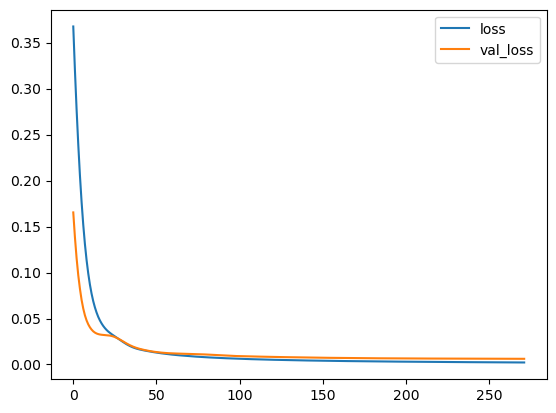

In [19]:
plt.plot(history.history['loss'][:-50], label='loss')
plt.plot(history.history['val_loss'][:-50], label='val_loss')
plt.legend()
plt.show()

In [20]:
# 모델을 복원한다.
best_model = load_model('09_model.h5')
best_model

In [21]:
# 검증 데이터를 가지고 예측을 한다.
pred = best_model.predict(X_test)
pred

3/3 [==============================] - 0s 3ms/step


array([[0.44691822],
       [0.33740616],
       [0.32445854],
       [0.36254328],
       [0.5715673 ],
       [0.26393816],
       [0.11236276],
       [0.28658292],
       [0.2334467 ],
       [0.3976205 ],
       [0.11137788],
       [0.2145259 ],
       [0.54557556],
       [0.11511685],
       [0.14526619],
       [0.18502893],
       [0.38683188],
       [0.14592226],
       [0.29625213],
       [0.6099769 ],
       [0.12893164],
       [0.4274937 ],
       [0.8096138 ],
       [0.16200407],
       [0.261992  ],
       [0.8298169 ],
       [0.24278791],
       [0.3884436 ],
       [0.23046409],
       [0.30027756],
       [0.15008943],
       [0.09406264],
       [0.37819758],
       [0.24395742],
       [0.21126418],
       [0.47848338],
       [0.24121761],
       [0.39193618],
       [0.43409568],
       [0.33593774],
       [0.3871161 ],
       [0.36897537],
       [0.31594145],
       [0.19491862],
       [0.5442983 ],
       [0.16875881],
       [0.35198295],
       [0.326

In [22]:
# 스케일링 된 예측 데이터 복원
result = scaler2.inverse_transform(pred)
result = result.reshape(-1) # 1차원으로

In [23]:
# 평가
r1 = mean_squared_error(y_test.values, result)
r1 # 스케일링 하기 전보다 mse가 올라감 긋침환 학습을 빨리 끝낼 수 있다

9.026191311348402

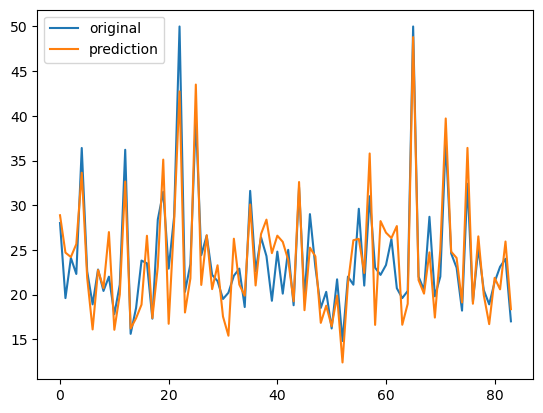

In [24]:
plt.plot(y_test.values, label='original')
plt.plot(result, label='prediction')
plt.legend()
plt.show()

In [25]:
# 데이터를 불러온다.
df2 = pd.read_csv('data/boston_new.csv')
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
166,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
167,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
168,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [26]:
# 표준화
X = scaler1.transform(df2)
X

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

In [28]:
# 저장된 모델을 복원한다.
best_model = load_model('09_model.h5')
best_model

In [29]:
# 예측한다.
pred = best_model.predict(X)
pred

6/6 [==============================] - 0s 2ms/step


array([[ 2.84473360e-01],
       [ 2.48717502e-01],
       [ 3.66130561e-01],
       [ 3.10588598e-01],
       [ 3.13020021e-01],
       [ 5.85970879e-01],
       [ 3.71405959e-01],
       [ 4.17136818e-01],
       [ 4.47173893e-01],
       [ 2.22708568e-01],
       [ 2.10438356e-01],
       [ 4.16724592e-01],
       [ 3.96735311e-01],
       [ 4.14410561e-01],
       [ 3.25167179e-01],
       [ 4.37605441e-01],
       [ 2.98658639e-01],
       [ 6.78023100e-01],
       [ 3.41083765e-01],
       [ 3.59395027e-01],
       [-4.17271554e-01],
       [ 2.28824481e-01],
       [ 7.46577829e-02],
       [ 8.17702152e-04],
       [-4.33005840e-02],
       [-8.22798163e-02],
       [ 2.52457112e-02],
       [ 1.96079776e-01],
       [ 1.23812303e-01],
       [ 7.69433826e-02],
       [-9.85231549e-02],
       [-4.63534296e-01],
       [-2.20728070e-02],
       [ 2.57295430e-01],
       [ 2.07217023e-01],
       [-4.00461137e-01],
       [-6.23191800e-03],
       [-5.75841784e-01],
       [-5.4

In [30]:
# 값 복원
result = scaler2.inverse_transform(pred)
result = result.reshape(-1)
result

array([ 2.26668835e+01,  2.13010082e+01,  2.57861862e+01,  2.36644840e+01,
        2.37573643e+01,  3.41840897e+01,  2.59877071e+01,  2.77346249e+01,
        2.88820438e+01,  2.03074684e+01,  1.98387470e+01,  2.77188778e+01,
        2.69552898e+01,  2.76304836e+01,  2.42213860e+01,  2.85165291e+01,
        2.32087593e+01,  3.77004814e+01,  2.48294010e+01,  2.55288906e+01,
       -4.13977337e+00,  2.05410957e+01,  1.46519270e+01,  1.18312359e+01,
        1.01459179e+01,  8.65691090e+00,  1.27643862e+01,  1.92902489e+01,
        1.65296307e+01,  1.47392368e+01,  8.03641510e+00, -5.90701008e+00,
        1.09568186e+01,  2.16286850e+01,  1.97156906e+01, -3.49761558e+00,
        1.15619402e+01, -1.01971560e+01, -9.11579895e+00,  3.54854889e+01,
        5.09248734e+00, -5.38494062e+00,  3.63384323e+01,  1.34334412e+01,
        2.70468567e+02,  8.74793625e+00, -8.56790638e+00, -3.44909716e+00,
       -4.23237276e+00, -4.23248672e+00,  2.42666874e+01,  1.36155338e+01,
       -1.58073902e+01, -

In [31]:
df2['target'] = result
df2.to_csv('data/boston_dl2.csv')

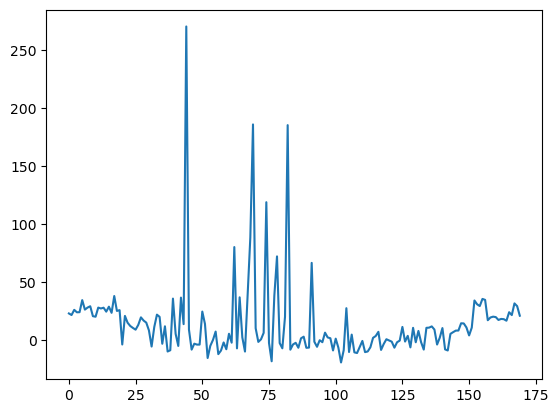

In [32]:
plt.plot(result)
plt.show()